# TNE 2: Principal Component Analysis

The purpose of this tutorial is to use Principal Component Analysis (PCA) 
for dimension reduction applied to images.


In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt

from numpy import linalg as la

## 1. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images of handwritten digits which are 5 and 6 here. Each line of the matrix contains 256 pixel values coding for the gray level of a 16x16 image.

In [2]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

#### Examples of images:

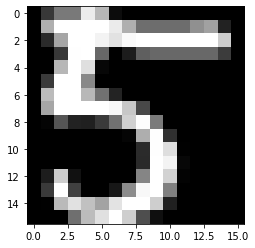

In [3]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

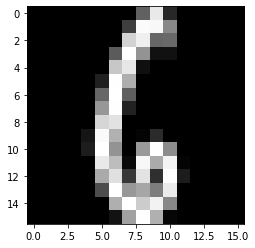

In [4]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

#### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:

In [5]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

## 2. Principal Component Analysis

The purpose of this part is to observe the respective contributions of
each component of a PCA of images of 5. The function `sklearn.decomposition.PCA` of `scikit-learn` is available. In practice, one must first estimate the mean vector and then work with centered data. 

### Documentation
First have a look at
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    

In [6]:
# Principal component analysis
moy_train = x_train_brut.mean(axis=0)  # all the data, 5 & 6
x_train_centre = x_train_brut-np.tile(moy_train,(N_train,1))

# PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components
proj = pca.transform(x_train_centre)  # computes the projection coefficients

### Display the averaged images of 5 & 6 respectively

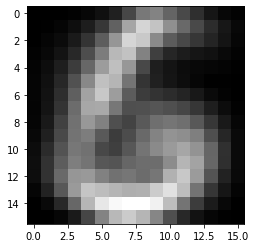

In [7]:
I_moy = np.reshape(moy_train,(16,16))   # averaged image = mean 
plt.imshow(I_moy,cmap = 'gray')
plt.show()

### Display an example rebuilt from the 1st component only

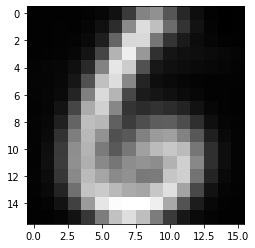

In [8]:
n=12   # choice of image no n=12 or any other

I = I_moy + proj[n,0]*np.reshape(comp[0,:],(16,16))  # adding the 1st PCA component 
plt.imshow(I,cmap='gray')
plt.show()

### Exercise 1: PCA & approximation

1. Read the documentation of function `PCA` and identify the input and output parameters.
2. Implement a progressive reconstruction of an image of digit 5 by adding the successive 
contribution of principal components.
3. Observe graphical results. How many components are necessary to obtain a 
reconstruction that you may consider as acceptable? nice? very nice?
4. Optional question: do the same for 6.


In [9]:
print(pca.__doc__)
import webbrowser
webbrowser.open("https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html")

Principal component analysis (PCA).

    Linear dimensionality reduction using Singular Value Decomposition of the
    data to project it to a lower dimensional space. The input data is centered
    but not scaled for each feature before applying the SVD.

    It uses the LAPACK implementation of the full SVD or a randomized truncated
    SVD by the method of Halko et al. 2009, depending on the shape of the input
    data and the number of components to extract.

    It can also use the scipy.sparse.linalg ARPACK implementation of the
    truncated SVD.

    Notice that this class does not support sparse input. See
    :class:`TruncatedSVD` for an alternative with sparse data.

    Read more in the :ref:`User Guide <PCA>`.

    Parameters
    ----------
    n_components : int, float or 'mle', default=None
        Number of components to keep.
        if n_components is not set all components are kept::

            n_components == min(n_samples, n_features)

        If ``n_components =

True

En entrée, on a besoin d'un array de la taille ($n_{samples}$, $n_{features}$)\
En sortie, on a les matrices $U, \Sigma$ et $V^H$, qui proviennent de la décomposition $\textit{SVD}$ avec $\Sigma$ comprenant les valeurs singulières et $U$ les directions des composantes principales. 

In [10]:
x_train_standardized = (x_train_centre.T/np.std(x_train_centre,1)).T
# x_train_standardized = x_train_centre

## Avec les 5

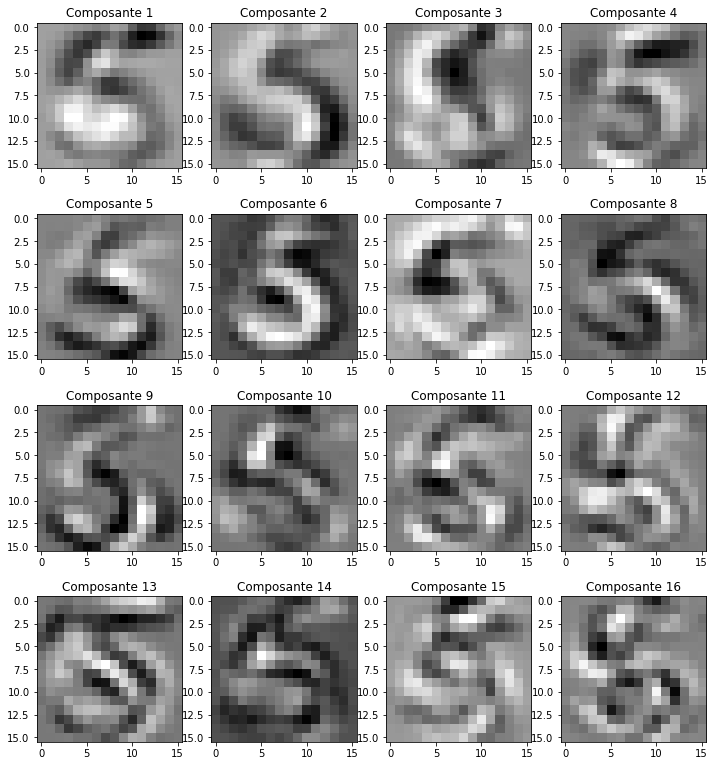

In [11]:
U, S, VH = la.svd(x_train_standardized[:145].T)
V = VH.T
columns = 4
nb_image = 16
plt.figure(figsize=(12,17))
for i in range(nb_image):
    
    plt.subplot(nb_image/ columns + 1, columns, i + 1)
    plt.title(f"Composante {i+1}")
    plt.imshow(np.reshape(U.T[i],(16,16)),cmap='gray')


Les variances sont conservées à 95.0 % dès qu'on a au moins 50 composants


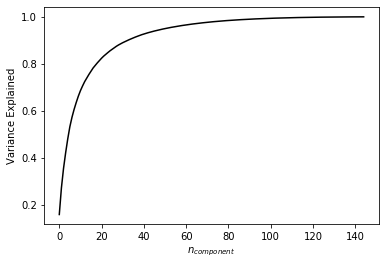

In [12]:
Variance_Explained5 = np.cumsum(S**2)/np.sum(S**2)
plt.plot(Variance_Explained5,color="black")
# plt.style.use("ggplot")
plt.xlabel("$n_{component}$")
plt.ylabel("Variance Explained")
p=0.95
print(f"Les variances sont conservées à {p*100} % dès qu'on a au moins {np.min(np.argwhere(Variance_Explained5>=p) )} composants")

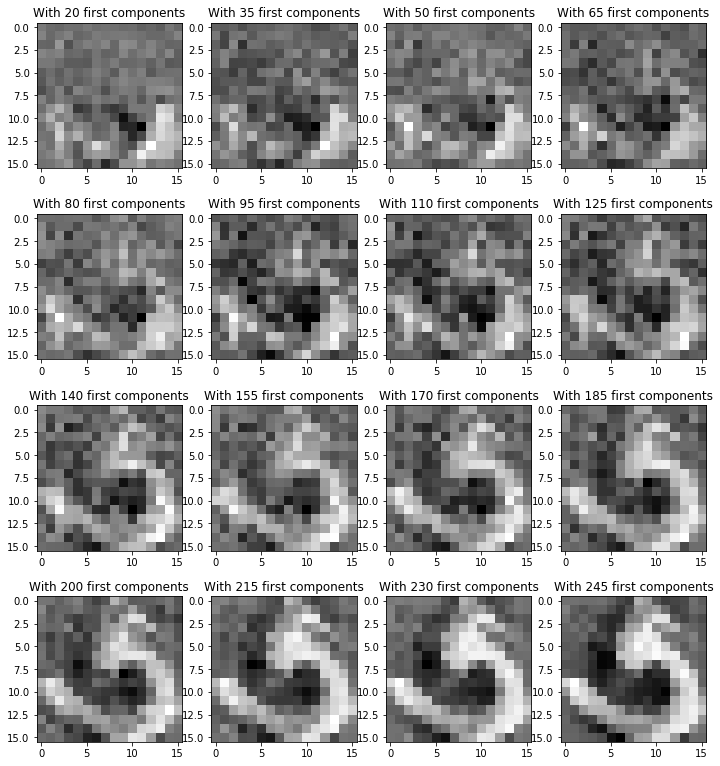

In [13]:
num_image = 64

columns = 4
nb_image = 16
plt.figure(figsize=(12,17))


for _,i in enumerate(range(20,260,250//nb_image)):
    plt.subplot(nb_image/ columns + 1, columns, _ + 1)
    
    z =  U @ x_train_standardized[num_image]
    z[i:]=0
    x_app =  U.T @z 
    plt.title(f"With {i} first components")
    plt.imshow(np.reshape(x_app,(16,16)),cmap='gray')

## Avec les 6

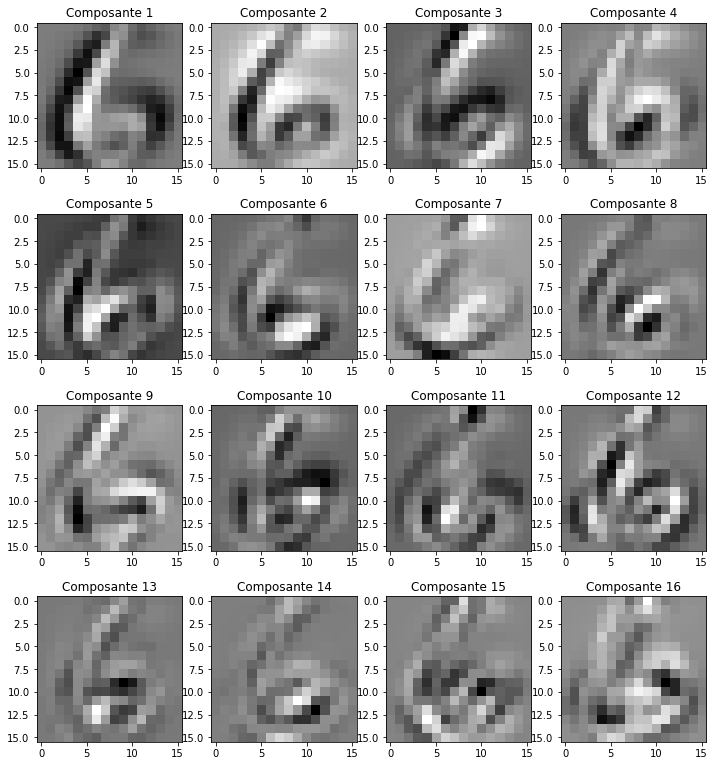

In [14]:
U, S, VH = la.svd(x_train_standardized[145:].T)
V = VH.T
columns = 4
nb_image = 16
plt.figure(figsize=(12,17))
for i in range(nb_image):
    
    plt.subplot(nb_image/ columns + 1, columns, i + 1)
    plt.title(f"Composante {i+1}")
    plt.imshow(np.reshape(U.T[i],(16,16)),cmap='gray')

Les variances sont conservées à 95.0 % dès qu'on a au moins 43 composants


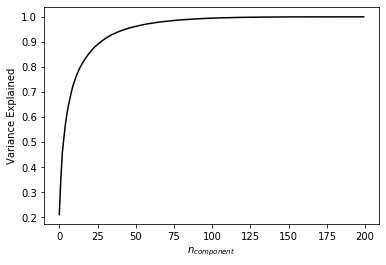

In [15]:
Variance_Explained6 = np.cumsum(S**2)/np.sum(S**2)
plt.plot(Variance_Explained6,color="black")
# plt.style.use("ggplot")
plt.xlabel("$n_{component}$")
plt.ylabel("Variance Explained")
p=0.95
print(f"Les variances sont conservées à {p*100} % dès qu'on a au moins {np.min(np.argwhere(Variance_Explained6>=p) )} composants")

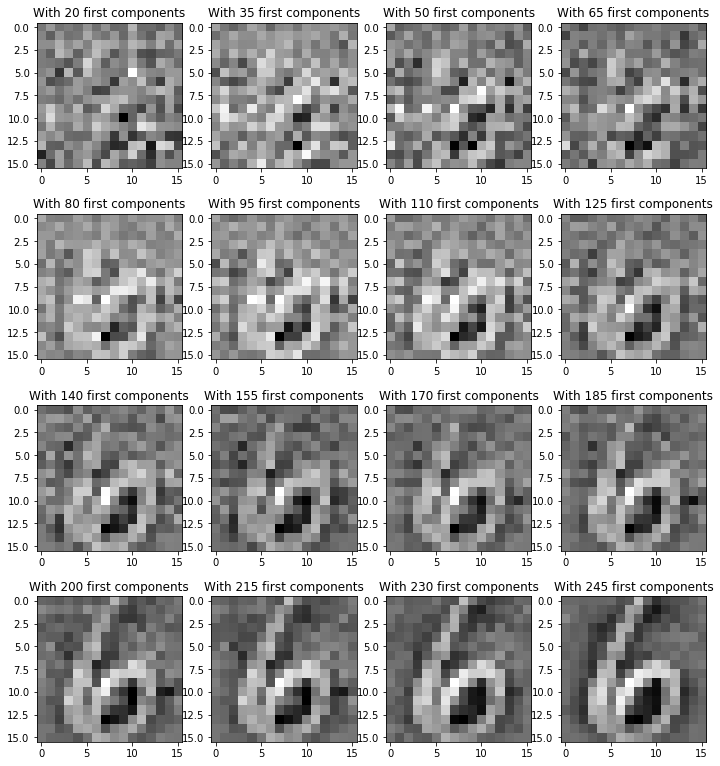

In [16]:
num_image = 250

columns = 4
nb_image = 16
plt.figure(figsize=(12,17))


for _,i in enumerate(range(20,260,250//nb_image)):
    plt.subplot(nb_image/ columns + 1, columns, _ + 1)
    
    z =  U @ x_train_standardized[num_image]
    z[i:]=0
    x_app =  U.T @z 
    plt.title(f"With {i} first components")
    plt.imshow(np.reshape(x_app,(16,16)),cmap='gray')

# Avec les 6 et les 5

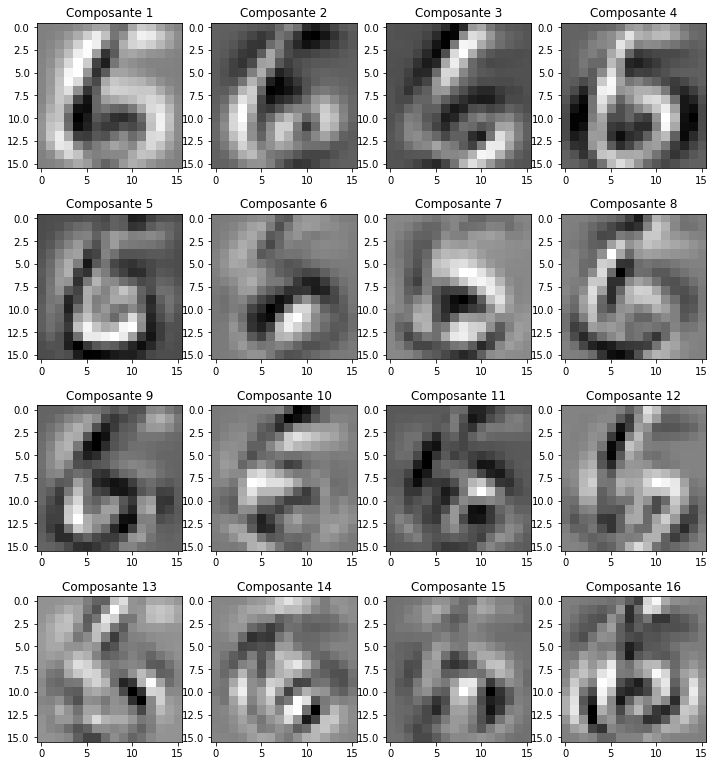

In [17]:
U, S, VH = la.svd(x_train_standardized.T)
V = VH.T
columns = 4
nb_image = 16
plt.figure(figsize=(12,17))
for i in range(nb_image):
    
    plt.subplot(nb_image/ columns + 1, columns, i + 1)
    plt.title(f"Composante {i+1}")
    plt.imshow(np.reshape(U.T[i],(16,16)),cmap='gray')

Les variances sont conservées à 95.0 % dès qu'on a au moins 66 composants


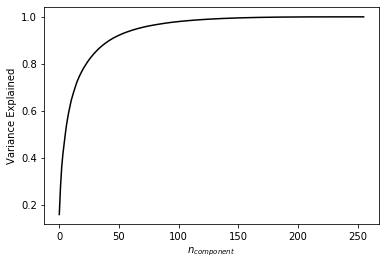

In [18]:
Variance_Explained_5et6 = np.cumsum(S**2)/np.sum(S**2)
plt.plot(Variance_Explained_5et6,color="black")
# plt.style.use("ggplot")
plt.xlabel("$n_{component}$")
plt.ylabel("Variance Explained")
p=0.95
print(f"Les variances sont conservées à {p*100} % dès qu'on a au moins {np.min(np.argwhere(Variance_Explained_5et6>=p) )} composants")

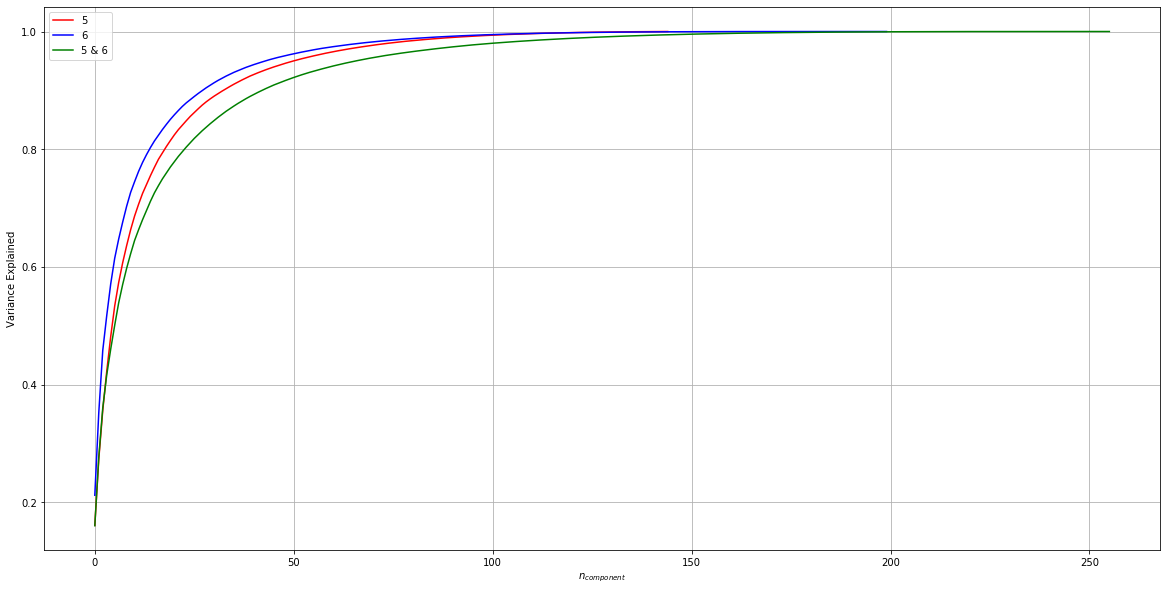

In [19]:
plt.figure(figsize=(20,10))
plt.plot(Variance_Explained5,color="red",label="5")
plt.plot(Variance_Explained6,color="blue",label="6")
plt.plot(Variance_Explained_5et6,color="green",label="5 & 6")
plt.xlabel("$n_{component}$")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid()
plt.show()

On remarque que la courbe du 6 est au dessous de la courbe du 5 qui est au dessus de la courbe des variances expliquées des deux. Ainsi, on en déduit qu'il faudra garder moins de composantes pour le 6 que pour le 5 (et biensur pour les deux à la fois) pour conserver un même taux de variances expliquées. 6 se distingue mieux que 5.

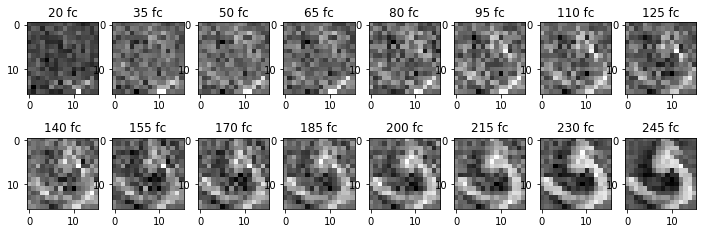

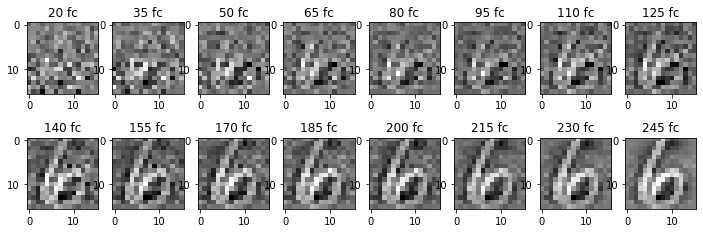

In [20]:
num_image = 64

columns = 8
nb_image = 16
plt.figure(figsize=(12,6))


for _,i in enumerate(range(20,260,250//nb_image)):
    plt.subplot(nb_image/ columns + 1, columns, _ + 1)
    
    z =  U @ x_train_standardized[num_image]
    z[i:]=0
    x_app =  U.T @z 
    plt.title(f"{i} fc")
    plt.imshow(np.reshape(x_app,(16,16)),cmap='gray')
plt.show()
num_image = 250
plt.figure(figsize=(12,6))
print("\n\n\n")

for _,i in enumerate(range(20,260,250//nb_image)):
    plt.subplot(nb_image/ columns + 1, columns, _ + 1)
    
    z =  U @ x_train_standardized[num_image]
    z[i:]=0
    x_app =  U.T @z 
    plt.title(f"{i} fc")
    plt.imshow(np.reshape(x_app,(16,16)),cmap='gray')

# Répondre à la question 3

### Exercise 2: PCA & classification
1. Use `proj[0:2,:]` as the coordinates of a point representing each sample
of the training set in a plane. Display the cloud of points associated to
digits 5 and 6 by using 2 different colors.
2. Comment on the repartition of points in the plane. 
3. Do you see how this PCA step makes possible the use of a much simpler classification? 
What would you propose as an alternative to logistic regression of TP3 then?


In [80]:
Z =   U@ x_train_standardized.T
proj = Z[0:2,:]
X1,X2 = proj[0],proj[1]


On remarque un outlier avec le PCA pour la première composante : 

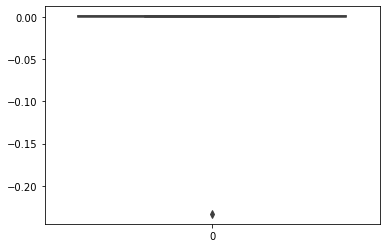

Les outliers sont dans cette liste : [33] 


In [81]:
import seaborn as sns

sns.boxplot(X1)
plt.show()

Outliers = np.argwhere(np.abs(X1-np.mean(X1)) >= 6*np.std(X1) ).ravel()
print(f"Les outliers sont dans cette liste : {Outliers} ")

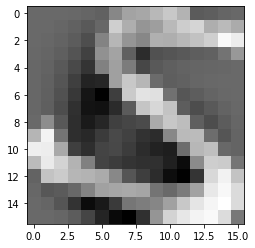

In [82]:
plt.imshow(x_train_standardized[33].reshape((16,16)),cmap='gray')
plt.show()

In [83]:
class_train = np.ones((345,1))  
class_train[:145] = 0 

X1 = np.delete(X1, 33, 0)
X2 = np.delete(X2, 33, 0)
class_train = np.delete(class_train, 33, 0).ravel()

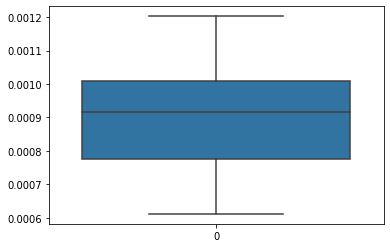

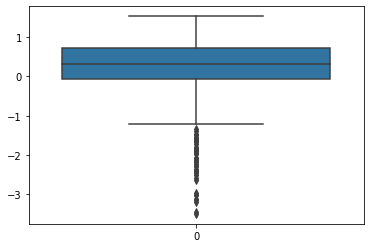

In [84]:
sns.boxplot(X1)
plt.show()

sns.boxplot(X2)
plt.show()

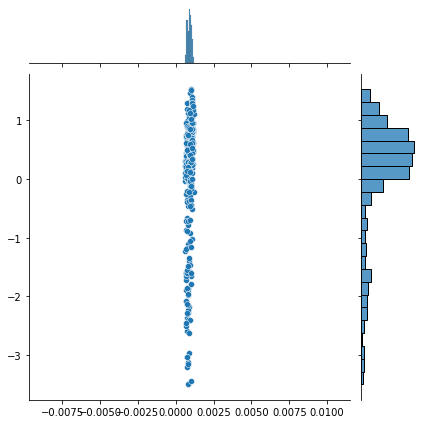

In [85]:
sns.jointplot(x= X1,y=X2)

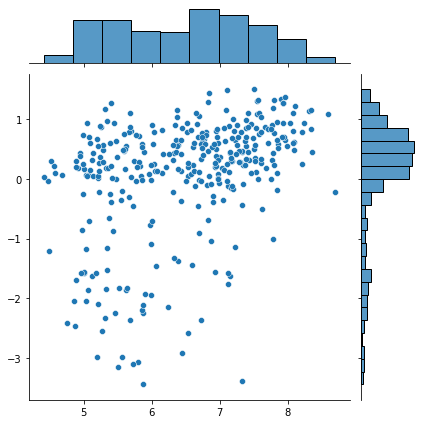

In [86]:
sns.jointplot(x= X1/np.std(X1),y=X2/np.std(X2))

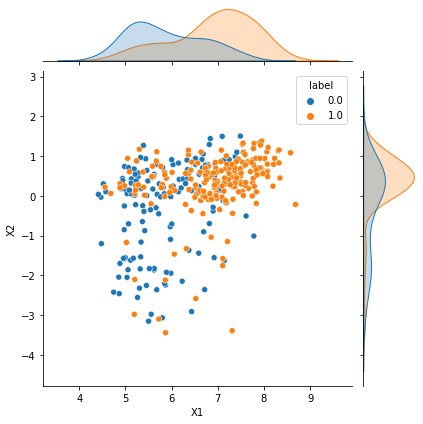

In [112]:


import pandas as pd
df = pd.DataFrame(np.vstack((X1,X2,class_train)).T,columns=["X1","X2","label"])
df.X1/=df.X1.std()
df.X2/=df.X2.std()
sns.jointplot(df,x="X1",y="X2", hue="label")

## Beyong this lab

Have a look at other examples of applications, like

http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
    